# TMA4320 Introduksjon til vitenskapelige beregninger

# Prosjekt 3: Simulasjon av aksjonspotensial med "random walk" av ioner

## Gruppe 50: Kristine Schüller, Sigrid Aunsmo 

# To do


- skrive riktige enheter!!!!!!!!!!!!!!!!!!!!!1

- sjekke at det ikke står feil enheter, eller ikke Latex noe sted (typ ikke "betaV0" elns i teksten)

- sjekk at vi bruker verdiene oppgitt i oppgaveteksten (riktig antall tiddsteg feks har jo blitt endret mye på underveis)
- kilde rottmann


# Oppgave 2 

## 2.1 

Det skal vises at funksjonen  

$$ 
\begin{align}
  \tilde{\phi}(x,t)=\frac{1}{\sqrt{4 \pi D t}} e^{- \frac{(x-\mu)^2 }{4 D t}},
\end{align} 
$$

der D er en konstant, er en løsning på diffusjonsligningen som er gitt ved

$$
\begin{align}
\frac{\partial \phi (x,t) }{\partial t}= D \frac{\partial^2 \phi (x,t)}{\partial x^2}.
\end{align}
$$


Først finnes den tidsderiverte av $\tilde{\phi}$
$$
\begin{align}
\frac{\partial \tilde{\phi} (x,t)}{\partial t} &=\frac{\partial}{\partial t}\frac{1}{\sqrt{4 \pi D t}} e^{- \frac{(x-\mu)^2 }{4 D t}} \\
&=  \Big ( \frac{\partial}{\partial t} \frac{1}{\sqrt{4 \pi D t}} \Big )  e^{- \frac{(x-\mu)^2 }{4 D t}}
+ \frac{1}{\sqrt{4 \pi D t}}  \Big ( \frac{\partial}{\partial t}  e^{- \frac{(x-\mu)^2 }{4 D t}} \Big )  \\
&=\frac{1}{\sqrt{4 \pi D t}}e^{- \frac{(x-\mu)^2 }{4 D t}}\Big( \frac{-1}{2t} + \frac{(x-\mu)^2}{4 D t^2} \Big).
\end{align}
$$

Deretter finnes den dobbeltderiverte av $\tilde{\phi}$ med hensyn på x:
$$
\begin{align}
 \frac{\partial^2 \tilde{\phi} (x,t)}{\partial x^2} &=\frac{\partial^2 }{\partial x^2} \frac{1}{\sqrt{4 \pi D t}} e^{- \frac{(x-\mu)^2 }{4 D t}}  \\
&= \frac{\partial}{\partial x} \Big ( \frac{-2 (x-\mu)}{4 D t}  \frac{1}{\sqrt{4 \pi D t}}  e^{- \frac{(x-\mu)^2 }{4 D t}} \Big )\\
&= \frac{1}{D \sqrt{4 \pi D t}}  e^{- \frac{(x-\mu)^2 }{4 D t}} \Big(   
\frac{-1}{2 t} + \frac{ (x-\mu)^2}{4 D t^2}
\Big)
\end{align}
$$



Høyre side av diffusjonsligningen blir altså
$$
\begin{align}
D \frac{\partial^2 \tilde{\phi} (x,t)}{\partial x^2} =\frac{1}{\sqrt{4 \pi D t}}e^{- \frac{(x-\mu)^2 }{4 D t}}\Big( \frac{-1}{2t} + \frac{(x-\mu)^2}{4 D t^2} \Big),
\end{align}
$$
som er lik den tidseriverte av $\tilde{\phi}$. Det er dermed vist at funksjonen er en løsning på diffusjonslikningen.   


## 2.2

### 2.2.1

Det antas et uendelig 1D system med konstant diffusjonskoeffisient D. Partikkeldistribusjonen som undersøkes er gitt ved
$$
\begin{align}
\phi(x,0)=\delta (x-x_0),
\end{align}
$$
der $\delta (x-x_0)$ er Dirac delta-funksjonen, som kan uttrykkes som
$$
\begin{align}
\delta (x-x_0) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk.
\end{align}
$$

For å finne tidsutviklingen $\phi(x,t)$ finnes først den tidsderiverte evaluert i $t=0$ ved bruk av diffusjonsligningen:

$$
\begin{align}
\frac{\partial}{\partial t}\phi(x,t) \big |_{t=0} &= D \frac{\partial^2}{\partial x^2} \phi (x,t) \big |_{t=0} \\
&=D \frac{\partial^2}{\partial x^2} \delta(x-x_0)  \\
&= D \frac{1}{2\pi} \frac{\partial^2}{\partial x^2} \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk \\
&= D \frac{1}{2\pi}  \int_{-\infty}^{\infty} -k^2  e^{-ik(x-x_0)}dk  \\
\end{align}
$$



For å finne $\phi(x,t)$ kan en så se på Taylor-utviklingen av funksjonen 

$$
\begin{align}
\phi (x,t) &= \phi (x,0) + \sum_{n=1}^{\infty} \frac{t^n}{n!} \frac{\partial^n 
}{\partial t'^n } \phi(x,t')
\Big |_{t'=0}    \\
\end{align}
$$

For å bestemme den n-te tidseriverte evaluert i $t=0$ kan en først se på den tidsderiverte av $\phi(x,t)$ gitt ved

$$
\begin{align}
\frac{\partial}{\partial t} \phi (x,t) &= \sum_{n=1}^{\infty} \frac{n t^{n-1}}{n!} \frac{\partial^n }{\partial t'^n } \phi(x,t')
\Big |_{t'=0}    \\
&=  \sum_{n=1}^{\infty} \frac{t^{n-1}}{(n-1)!} \frac{\partial^n }{\partial t'^n } \phi(x,t')
\Big |_{t'=0}    \\
&= \sum_{n=0}^{\infty} \frac{t^{n}}{(n)!} \frac{\partial^n}{\partial t'^n } \frac{\partial }{\partial t' }\phi(x,t')\Big |_{t'=0}
\\
\end{align}
$$

Ved bruk av diffusjonsligningn kan den tidsderiverte av $\phi(x,t)$ også uttrykkes som
$$
\begin{align}
\frac{\partial}{\partial t} \phi (x,t) &= D \frac{\partial^2}{\partial x^2} \phi (x,t) \\
&=  \sum_{n=0}^{\infty} \frac{t^{n}}{n!} \frac{\partial^n }{\partial t'^n } \frac{\partial^2}{\partial x^2} D \phi(x,t')
\Big |_{t'=0}   
\\
\end{align}
$$

Ettersom Taylor utviklingen er entydig kan det nå ses at
$$
\begin{align}
&\frac{\partial }{\partial t' }\phi(x,t')\Big |_{t'=0} = \frac{\partial^2}{\partial x^2} D \phi(x,t') \Big |_{t'=0}\\
\Longrightarrow  &\frac{\partial^n}{\partial t'^n}\phi(x,t')\Big |_{t'=0} =\frac{\partial^{2n}}{\partial x^{2n}} D^n \phi(x,t') \Big |_{t'=0}\\
\end{align}
$$

Dermed er det vist at

$$
\begin{align}
\phi (x,t) &=\phi(x,0)+ \sum_{n=1}^{\infty}  \int_{- \infty}^{\infty}  \frac{(-Dk^2t)^n}{n!}   e^{-ik(x-x_0}) \\
&= \frac{1}{2 \pi} \int_{- \infty}^{\infty} e^{-Dk^2t}e^{-ik(x-x_0}) dk
\end{align}
$$

Denne typen integral er oppgitt i $\textit{Matematisk formelsamling}$ side 155, ligning 51) 
$$
\begin{align}
\int_{-\infty}^{\infty} e^{-(ax^2+2bx+c)}dx=\sqrt{\frac{\pi}{a}} e^{ \frac{b^2-ac}{a} }.
\end{align}
$$
## kilde rottmann

Ved å sette $a=Dkt^2$, $b=i(x-x_0)$ og $c=0$ kan integralet ovenfor regnes ut og resultatet blir 
$$
\begin{align}
\phi(x,t) = \frac{1}{\sqrt{4\pi Dt}} e^{-\frac{(x-x_0)^2}{4Dt}}
\end{align}
$$



### 2.2.2

$\phi(x,t)$ fra oppgave 2.2.1 er en normalfordeling med standardavvik $\sigma=\sqrt{2Dt}$ og foventningsverdi $\mu=x_0$. Variansen sier noe om spredningen av partiklene, og en større verdi av $D$ gir en større varians. Det vil si at desto større $D$ er, desto raskere spres partiklene. 

### 2.2.3 

I denne seksjonen benyttes resultatet fra oppgave 2.2.1 til å finne tidsutviklingen $\phi(x,t)$ gitt initialfordelingen $\phi (x,0) = g(x)$, der $g(x)$ er en vilkårlig funksjon.

I likhet med i oppgave 2.2.1 begynner vi også her med å se på Taylor-utviklingen
$$
\begin{align} 
\phi(x,t) = \sum_{n=0}^{\infty} \frac{t^n}{n!} \frac{\partial^n}{\partial t'^n} \phi(x, t') \Big |_{t'=0}
\end{align}
$$
Videre brukes det at $g(x)$ kan skrives som $g(x)=\int_{-\infty}^{\infty} g(y) \delta(y-x)$, og diffusjonslikningen benyttes for å finne den tidsderiverte av $\phi$ evaluert i $t=0$
$$
\begin{align} 
\frac{\partial}{\partial t} \phi(x,t) &= D \frac{\partial^2}{\partial x^2} \phi(x,t) \Big |_{t=0} \\
&= D \frac{\partial^2}{\partial x^2} g(x) \\
&= D \frac{\partial^2}{\partial x^2} \int_{-\infty}^{\infty} g(y) \delta(y-x) dy \\
&= D \frac{\partial^2}{\partial x^2} \int_{-\infty}^{\infty} g(y) \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-ik(y-x)} dk dy \\
&= \int_{-\infty}^{\infty} g(y) \frac{1}{2\pi} \int_{-\infty}^{\infty} (-Dk^2) e^{-ik(y-x)} dk dy \\
\end{align}
$$

Dette brukes videre i Taylor-utviklingen, slik som i oppgave 2.2.1.

$$
\begin{align} 
\phi(x,t) &= \sum_{n=0}^{\infty} \frac{t^n}{n!} \frac{1}{2 \pi} \int_{-\infty}^{\infty} g(y) \int {-\infty}^{\infty} (-Dk^2)^n e^{-ik(y-k)} dk dy \\
&= \frac{1}{2 \pi} \int_{-\infty}^{\infty} g(y) \int {-\infty}^{\infty} \sum_{n=0}^{\infty} \frac{(-Dtk^2)^n}{n!}  e^{-ik(y-k)} dk dy \\
&= \frac{1}{2 \pi} \int_{-\infty}^{\infty} g(y) \int {-\infty}^{\infty} e^{-Dtk^2}  e^{-ik(y-k)} dk dy. \\
\end{align}
$$

De innerste intregralet ble løst i oppgave 2.2.1, og dermed har vi at
 
$$
\begin{align}
\phi(x,t) = \int_{-\infty}^{\infty} \frac{g(y)}{   \sqrt{4 \pi D t} } e^{  \frac{-(y-x)^2}{4 D t}  } dy
\end{align}
$$.


# Oppgave 3
I koden nedenfor simuleres "random walk" i 1D. Dette gjøres ved å for hvert tidsintervall $\Delta t$ bestemme tilfeldig om en partikkel skal gå et steg til venstre eller ett steg til høyre. Her er det antatt at alle steg har lengde $h=1$, og at partikkelen ikke kan stå i ro; den må altså ved hvert steg gå enten til høyre eller til venstre. 

For å finne ut om en partikkel går mot høyre eller venstre benyttes funksjonen generateRandomStep. Den tar inn sannsynligheten P for at partikkelen skal gå mot venstre. I denne oppgaven er P=0.5, slik at steg i begge retninger er like sannsynlige. Funksjonen genererer et tilfeldig flyttall mellom 0 og 1 ved bruk av funksjonen random() fra random-biblioteket. Den returnerer -1 dersom det tilfeldige tallet er mindre enn P, og 1 dersom det er større enn P. 

Funksjonen randomParticlePosition tar inn sannsynligheten P for steg mot venstre sammen med totalt antall tidssteg. Startposisjonen settes lik 0. For hvert tidssteg flyttes partikkelens posisjon et steg mot høyre eller venstre, bestemt av generateRandomStep. Verdien -1 tilsvarer et skritt mot venstre, mens verdien 1 tilsvarer et skritt mot høyre. Funksjonen returnerer partikkelens posisjon etter totalt antall tidssteg. 

Alle partiklene slippes i punktet $x=0$. Funksjonen plotMultipleParticlePos tar inn antall partikler n og antall tidssteg t. Partiklene tar et steg for hvert tidssteg. Det opprettes en liste for å lagre de endelige sluttposisjonene til alle partiklene. Tilfeldige posisjoner for n partikler beregnes ved hjelp av randomParticlePosition, og posisjonene legges til i listen. Posisjonene plottes i et histogram, slik at høyden på hver søyle representerer andelen partikler på de aktuelle posisjonene. Det beregnes også en normalfordeling tilpasset dataene som plottes sammen med histogrammet. 


In [1]:
#importerer nødvendige biblioteker
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import scipy.constants

#Setter parametere for plotting
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.0}
plt.rcParams.update(newparams)



n=1000  #antall partikler
t=100   #antall tidssteg

#returnerer -1 for skritt mot venstre, og 1 for skritt mot høyre
#P er sannsynligheten for skritt mot venstre 
def generateRandomStep(P): 
    randomNumber=random.random() #tilfeldig flyttall mellom 0 og 1
    if randomNumber<=P: 
        return -1  #returnerer -1 dersom det tilfeldige tallet er mindre eller lik 0.5
    else:
        return 1 #returnerer 1 dersom det tilfeldige tallet er større enn 0.5

#returnerer 1 partikkels posisjon etter t tilfeldige skritt
def randomParticlePosition(t,P): 
    pos=0 #setter startposisjonen lik 0
    for i in range(t): #for t antall tidssteg
        step=generateRandomStep(P) #tilfeldig steg mot venstre eller høyre (-1 eller 1)
        pos+=step #oppdaterer posisjonen
    return pos #returnerer sluttposisjonen

#plotter tilfeldige posisjoner for n antall partikler
def plotMultipleParticlesPos(n,t):
    listOfPositions=[]  #tom liste for å lagre posisjonene i
    for i in range(n):           #for n partikler
        pos=randomParticlePosition(t,0.5)   #finner posisjon til partikkelen etter t tidssteg
        listOfPositions.append(pos)   #legger til posisjonen i listen
    xList = np.arange(min(listOfPositions),max(listOfPositions),1)  #oppretter liste med x-verdier til plottingen

    parameters=norm.fit(listOfPositions) #parameterne til normalfordeling tilpasset dataene
    fitted_pdf = norm.pdf(xList,loc = parameters[0],scale = parameters[1]) #normalfordelingskurve til parameterne

    plt.plot(xList,fitted_pdf,"red",label='tilpasset normalfordeling') #normalfordelingskurve
    plt.hist(listOfPositions,density=True,bins=41,range=(-41,41),label='simulert partikkelfordeling')  #plotter dataene som histogram
    plt.title("Figur 1: Random walk i 1D med V=0") #titler
    plt.ylabel("Andel partikkler")
    plt.xlabel("x")
    plt.legend()
    plt.show()
    
        
plotMultipleParticlesPos(n,t) #kjører funksjonen



<Figure size 1600x500 with 1 Axes>

Figur 1 viser et histogram av andel partikkler per posisjon etter simulert  "random walk" i 1D. Den røde grafen viser normalfordeling best mulig tilpasset pariklenes posisjon.  Ved å sammenlikne histogrammet med den røde kurven ser en at partiklenes posisjoner er tilnærmet normalfordelt. I oppgave 2 er initialfordelingen lik $\delta (x-x_0)$. I simulasjonen tilnærmes $\delta(x)$ ved å slippe alle partikklene i posisjonen $x=0$.  Fra oppgave 2 kan en se at denne initialfordelingen etter 100 steg gir en normalfordeling med standardavvik $\sigma=\sqrt{2Dt}$. Forventingsverdien til normalfordelingen er tilnærmet lik 0, noe som tyder på at partiklenes spredning er tilnærmet lik i begge retninger. Det er visse ujevnheter i histogrammet, men ikke utover det som kan forventes med det gitte antallet partikler. Et større antall partikler ville kunne gi et jevnere histogram. Resultatet ser altså ut til å stemme godt overens med teorien. 

# Oppgave 5

I oppgave 3 ble det sett på random walk i 1D uten noe potensial. I denne oppgaven legges det på et potensial og det undersøkes hvordan dette påvirker partikkelspredningen. Som tidligere slippes 1000 partikler i $x=0$ ved $t=0$, og partiklene har i alle plottene nedenfor beveget seg 100 steg. 

I forrige oppgave var det like sannsynlig at partiklene beveget seg til høyre som til venstre, og null sannsynlighet for at partikkelen sto i ro. Her er det fremdeles null sannsynlighet for at partikkelen står i ro, men sannsynligheten for å gå mot hver av sidene påvirkes av potensialet. Dette er fordi en partikkel har større sannsynlighet for å bevege seg i den retningen som vil gi den mindre energi. 

Sannsynligheten $P$ for å finne en partikkel i en bestemt posisjon avhenger av posisjonen $x$ og impulsen $p$ 

$$
\begin{align}
P(p,x) \propto e^{-\beta E(p,x)},
\end{align}
$$

der $E(p,x)$ er partikkelens energi og $\beta=1/(k_BT)$, med $k_B$ som Boltzmanns  konstant og $T$ som temperaturen. Temperaturen er satt til kroppstemperaturen på $310 K$. Det antas at partiklene alle har lik impuls $p$ slik at den kinetiske energien er konstant. 

La $P^-$ være sannsynligheten for at en partikkel beveger seg et steg mot venstre og $P^+$ være sannsynligheten for at den går mot høyre. Dette gir at 

$$
\begin{align}
\frac{P^-}{P^+}=e^{-\beta[V(x-h)-V(x+h)]},
\end{align}
$$ 

der $V(x)$ er den potensielle energien til partikkelen i posisjon $x$. Videre er sannsynlingheten for å gå mot venstre gitt ved
$$
\begin{align} 
P^-=\frac{\frac{P^-}{P^+}}{1+\frac{P^-}{P^+}}.
\end{align}
$$

Funksjonene V1, V2 og V3 returnerer potensial som funksjon av posisjon x, og de benyttes henholdsvis i oppgave 5.1, 5.2 og 5.3. Disse benyttes når P skal beregnes, noe som gjøre ved hjelp av likningene ovenfor. I hver av deloppgavene nedenfor kjøres simulasjonen for 4 ulike verdier for $\beta k$. Den høyeste verdien av $\beta k$ er valgt til 5, fordi høyere verdier enn dette ikke vil gi synlige forskjeller på resultatene. 

In [2]:
T0=310 #temperatur
kb=scipy.constants.k #Boltzmanns konstant
h=1 #skrittlengde
t=100 #antall tidssteg
n=1000 #antall partikler

#endrer størrelsen på plottet
newparams = {'figure.figsize': (15, 9)} #figurstørrelse
plt.rcParams.update(newparams) #oppdaterer plotteparametere


#Definerer potensialfunksjoner

def V1(x):
    return x #potensialet er likt overalt

def V2(x):
    if abs(x)<3*h:  #x>-3*h 3*h or x<3*h: inni membranen
        return 1
    else:
        return 0 #ikke inni membranen
    
def V3(x):
    if x<-3*h: #inni cellen
        return -1 
    elif x>3*h: #utenfor cellen
        return 1
    else:  #inni cellemembranen
        return (-1+2*((x+3*h)/6*h)) 
    
     
#Funksjonen plotter partikklenes posisjoner etter t tidssteg for ulike verdier av beta*k
#betaks er en liste med verdier for beta*k
#h=skrittlengden, n=antall partikler, t=antall tidssteg
#V er potenisalet og supTitle er tittelen for hele plottet
def plotParticlePositionInPotential(betaks,h,n,t,V,supTitle):
    listOfPosForPlotting =[] #tom liste for posisjoner til plotting
    for betak in betaks:  #iterer gjennpm verdiene av beta*k
        posList=[]  #tom liste for posisjonene for nåværende verdi av beta*k
        for i in range(n):#for n partikler
            pos=0 #setter startposisjon lik 0
            for j in range(t): #t antall skritt
                PdivP=math.exp(-betak*(V(pos-h)-V(pos+h))) #Finner sannsynligheten for et skritt til venstre
                P=PdivP/(1+PdivP)
                step=generateRandomStep(P) #tilfeldig steg
                pos+=step #oppdaterer posisjonen 
            posList.append(pos); #legger til posisjonen i listen 
        listOfPosForPlotting.append(posList) #legger til posisjonslistene for alle verdiene av beta*k
    #plotter
    plt.suptitle(supTitle,fontsize=22) #tittel for hele plottet
    for i in range (1,len(betaks)+1):  #plot for hver verdi av beta*k
        title = r'$\beta$k= ' + str(betaks[i-1])
        plt.subplot(2,2,i)
        plt.hist(listOfPosForPlotting[i-1], density=True,bins=101, range=(-101,101)) #sørger for at det er en mulig posisjon per bin
        plt.title(title)
    
    plt.show()
    

## 5.1

Nedenfor kjøres simulasjon med et potensial som er proposjonalt med $x$, gitt ved
$$
\begin{align}
V(x)=kx.
\end{align}
$$

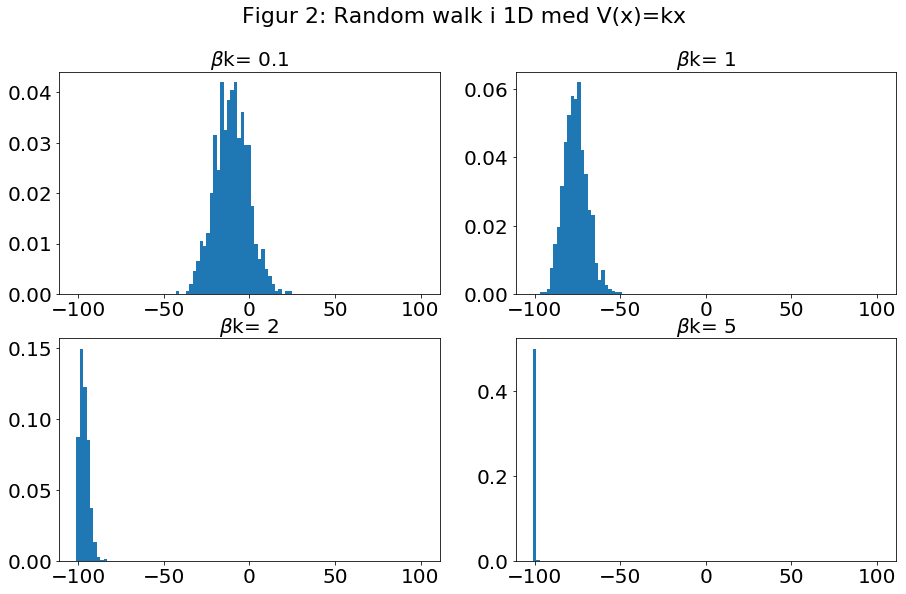

In [3]:

betaks=[0.1,1,2,5] #liste med verdier av beta*k

#plotter
title5_1="Figur 2: Random walk i 1D med V(x)=kx"
plotParticlePositionInPotential(betaks,h,n,t,V1,title5_1)


Figur 2 viser simulert partikkelfordeling etter at partiklene har gått 100 steg i potensialet gitt ved $V(x)=kx$. Simulasjonen er gjort med 4 ulike verdier for $\beta k $. For større verdier av $\beta k$ ser partiklene ut til å samles lenger til venstre. Dette stemmer overens med teorien: potensialet øker mot høyre og derfor er det mer sannsynlig at partikkelen beveger seg mot venstre. Desto større denne potensialgradienten $k$ er, desto mindre sannsynlig er det at partiklene beveger seg mot høyre. 

## 5.2
I denne deloppgaven kjøres simulajsonen med et potensial gitt ved 
$$
\begin{align}
& V(x)= k,  \; \; \textrm{for} \; \;-3h<x<3h. \\
& V(x) = 0 \; \; \textrm{ellers}. 
\end{align}
$$

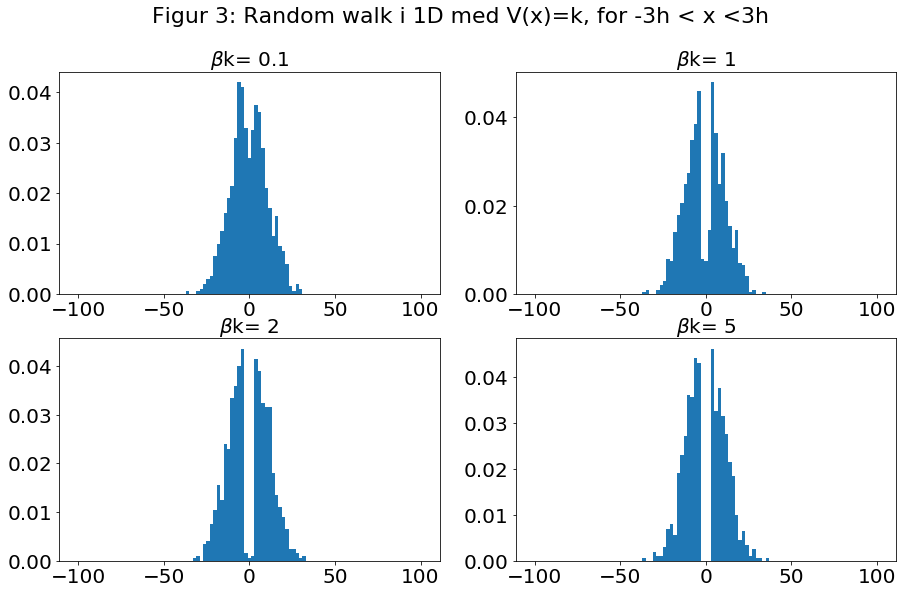

In [4]:
#plotter
title5_2="Figur 3: Random walk i 1D med V(x)=k, for -3h < x <3h "
plotParticlePositionInPotential(betaks,h,n,t,V2,title5_2)


Figur 3 viser partiklenes posisjoner etter random walk med ulike verdier for $\beta k$. Her er potensialet lik $k$ for $-1<x<1$ og 0 ellers. Plottet viser at en større verdi av $\beta k$, og dermed et høyere potensial, i midten gir mindre sannsynlighet for at pastiklene vil befinne seg der. Videre kan det ses at partiklene spres tilnærmet like mye til begger sider. Dette er i tråd med at potensialet er symmetrisk. Et slikt potensial kan representere to områder avskilt av en cellemembran.

## 5.3 

I denne oppgaven er potensialet gitt ved

$$
\begin{align}
&V(x)=-k, \; \; \textrm{for}  \; \;  x<-3h.\\
&V(x) =k \Big( -1+2\frac{x+3h}{6h} \Big), \; \; \textrm{-3h<x<3h}. \\
&V(x) = k, \; \; \textrm{for} \; \; x>3h. 
\end{align}
$$

Dette tilsvarer to potenisalnivåer med en potenisalforskjell $2k$, og en linær overgang mellom dem. 

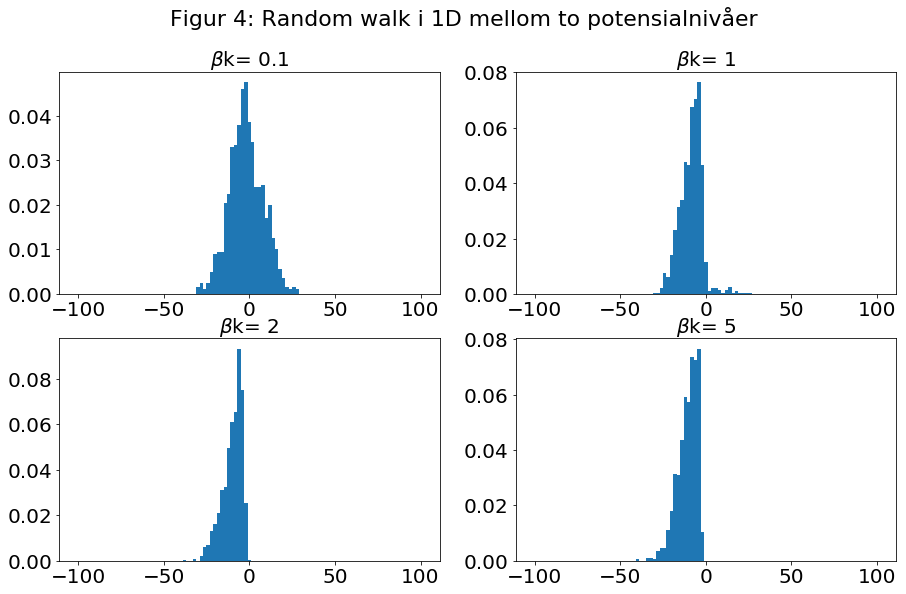

In [5]:
#plotter
title5_3="Figur 4: Random walk i 1D mellom to potensialnivåer"
plotParticlePositionInPotential(betaks,h,n,t,V3,title5_3)


Figur 4 viser at partiklenes posisjoner ligger mer mot venstre når potensialet er større for $x>0$ og mindre for $x<0$. Plottene viser at desto større potensialforskjellen mellom de to sidene er, desto mindre sannsynlig er det at partiklene beveger seg mot høyre side. Dette potensialet kan brukes til å modellere en cellemembran med ulikt potensial på hver side. 


# Oppgave 7
I denne oppgaven simuleres "random walk" i 1D over en cellemembran. I simulasjonen avgrenses systemet til å ha en lengde $L=50$, med cellemembranen plassert i omradet $-h \leq x \leq h$. Venstre side av membranen, $x<-h$, representerer området inne i cellen og høyre side av membranen, $x>h$, representerer området utenfor cellen.

Det er hvordan potensialforskjellen mellom innsiden og utsiden av membranen utvikles over tid som skal undersøkes. Potensialforskjellen er avhengig av ionekonsentrasjonen, og i koden representerer hver "partikkel" en konsentrasjon på 0.1 mM (0.1 millimol per liter). I alle oppgavene nedenfor starter simulasjonen med 50 Na$^+$- og 1400 K$^+$- partikler på innsiden ved posisjonen $x=-L/4$ og 1450 Na$^+$- og 50 K$^+$-partikler på utsiden i posisjon $x=L/4$.

Potensialforskjellen $V(t)$ beregnes ved hjelp av differansen mellom antall partikler på innsiden og utsiden av membranen. Antallet partikler på innsiden lberegnes etter iterasjon. Antallet partikler på utsiden holdes konstant lik startverdien selv om partiklene som er med i simulajsonen flytter på seg. I tillegg til ladningskonsentrasjonen avhenger potensialdifferansen også av kapasitansen til cellemembranen. Potensialdifferansen er gitt ved
$$
\begin{align}
V(t) = \frac{Q(t)}{C} = \frac{[Q(t)]^+}{C_c}
\end{align}
$$
der $Q(t)$ er den tidsavhengige ladningsforskjellen mellom innsiden og utsiden, $[Q(t)]^+$ er tidsavhengig forskjell i ladningskonsentrasjon, $C$ er kapasitansen og $C_c$ er konsentrasjonskapasitansen. Her brukes det at $C_c= 0.07 e$M/V. Ettersom hver partikkel representerer 0.1 mM, og dermed har ladningenskonsentrasjon 0.1 e mM, kan potensialet uttrykkes som følgende: 

$$
\begin{align}
V(t) = \Delta(\# \textrm{partikler}) \cdot \frac{0.01}{7} \textrm{V}.
\end{align}
$$

Funksjonen nedenfor lager først en liste for posisjonene til alle Na-partiklene og en for alle K-partiklene. For hvert steg flyttes partiklene med hjelpefunksjonen moveParticlesOneStep. Koden er endret fra tidligere oppgaver og bruker i større grad numpy arrays, men prinsippet om hvordan sannsynlighet regnes ut for at partiklene skal gå til høyre eller venstre er den samme som tidligere. Legg merke til at det er forskjell i potensiell energi og ikke potensialet i seg selv som bestemmer sannsynligheten for bevegelsen til partikkelen. Ettersom natriumioner og kaliumioner har ladning $e$ blir potensiell energi for partiklene lik $e*V(t)$.
Den potensielle energien avhenger i tillegg til $V(t)$ av potensialet ionene føler i membranen. 


Det er lagt inn en begrensning av systemets utstrekning, slik at en partikkel på kanten av systemet er nødt til å bevege seg tilbake inn i systemet ved neste steg. Etter at partiklene er flyttet regnes potensialet ut og legges til i en list. Listen med det tidsavhengige potensialet samt en liste av av alle tidssteg hvor potensialet måles returneres av funskjonen og kan deretter plottes.  

Funksjonen er generell for oppgave 7 og 8 og tar derfor også hensyn til at ionekanaler kan åpnes og lukkes for bestemte verdier av $V(t)$ og at SPP, sodium-potassium pump, kan aktiveres. Dette brukes ikke i oppgave 7, men blir benyttet i oppgave 8. 


In [6]:
"For å få store, tydelige plot"
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.0}
plt.rcParams.update(newparams)


In [7]:
#endrer størrelsen til plottene
newparams = {'figure.figsize': (16, 5)}
plt.rcParams.update(newparams)

#definerer konstanter
h=1 #skrittlengde
L=50 #Systemets størrelse
Cc=0.07*scipy.constants.e*scipy.constants.N_A   #konsentrasjonskapasitansen
x0=L/4 #startposisjon

#Antall Na- og K-partikler ved start på innsiden og utsiden av cellen
Na0_out=1450  
K0_out=50
Na0_in=50    
K0_in=1400

#flytter alle partiklene i en liste et steg
#posList er en liste over posisjoner, Vt er potensialforskjellen, V0 er membranpotensialet
def moveParticlesOneStep(posList,Vt,V0):
    
    #lager en liste med V(x+h) for alle x-verdier i posList (V of x pluss h)
    Vxph=Vt*np.heaviside(-(posList+h),0.5) #  V(x+h): Vt for alle (x+h)<-h, 0.5 for (x+h)=0 og 0 for (x+h)>h
    Vxph[np.where(abs(posList+h)<=h)]+=V0 
    
    #lager en liste med V(x-h) for alle x-verdier i posList på same måte som for Vxph, (V of x minus h)
    Vxmh=Vt*np.heaviside(-(posList-h),0.5)
    Vxmh[np.where(abs(posList-h)<=h)]+=V0
    
    #lager et array med PdivP
    PdivP=np.exp(-beta*(Vxph-Vxmh))
    P=1-PdivP/(1+PdivP)
    
    #lager et array med tilfeldige flyttall
    randomNumbers = np.random.rand(len(posList))
    
    steps=np.full(len(posList),1)                   
    steps[np.argwhere(randomNumbers<P)]=-1 
    
    posList[np.where(posList<-25)]+=2 
    posList[np.where(posList>25)]-=2
    
    posList+=steps

#returnerer liste med potensialverdier Vt og en liste med tidsverdier å plotte dem mot
#nt=antall tidssteg, V_open=potensialet for åpen kanal
#dersom man skal ha med pumpe eller at kanalene åpnes/lukkes, settes de siste parameterne lik True
#funksjonen tar også inn antall av de ulike partiklene på innsiden og utsiden av cellen ved start
def randomWalkMembrane(nt,Na_out,Na_in,K_out,K_in,VNa0,VK0,V_open=0,pump=False,gates=False): #hvilke parametere bør tas inn?
    tList= np.arange(0,nt,1) #liste med tidsverdier
    
    # lager array med posisjonene:
    NaPos=np.append(np.full(Na_in,-x0),np.full(Na_out,x0))   
    KPos= np.append(np.full(K_in,-x0),np.full(K_out,x0))
    
    
    #ladningsforskjell inni og utenfor cellen: 
    partIn=K_in+Na_in  #endres etter hvert steg
    partOut=K_out+Na_out  #konstant gjennom prosessen 
    diffPart=partIn-partOut  #differansen mellom antall partikler på utside og innside
    
    #liste hvor tidsutviklingen av spenningsdifferansen mellom innside og utside lagres
    VtList=[]   #tom liste for å legge potensialverdiene av Vt i              
    Vt=diffPart*(10/7)*1e-3 #potensial Vt ved start
    
    VNa=VNa0 
    VK=VK0
    
    for i in range(nt):
        
        #regner ut potensialet V(t), og legger til verdien i listen VtList
        Vt=diffPart*(0.01/7) #ny verdi
        VtList.append(Vt)   
        Vte=Vt*scipy.constants.e
        
        #Åpne og lukke porter (for oppgave 8)
        if gates==True:
            if Vt>0.03: #når potensialforskjellen blir over 0.03 lukkes Na-portene, og K-portene åpnes
                VNa=VNa0
                VK=V_open
            elif Vt<-0.07: #når potensialforskjellen blir under -0.07 lukkes K-portene og Na-portene åpnes
                VK=VK0
                VNa=V_open 
        
        #Flytt partiklene
        moveParticlesOneStep(NaPos,Vte,VNa)
        moveParticlesOneStep(KPos,Vte,VK)

        #pumpe (for oppgave 8.2)
        if pump==True and i%10==0:
            if len(NaPos[NaPos<-h])>=3 and len(KPos[KPos>h])>2:   #hvis det finnes nok ioner å pumpe
                SPP(NaPos,KPos) #kjører pumpen
        
                    
        #finner antall K-partikler inni cellen
        K_in = len(KPos[KPos<-h])
        #Finner antall Na-partikler inni cellen
        Na_in =len(NaPos[NaPos<-h])
    
        #Finner total ladningsforskjell
        diffPart=(K_in+Na_in)-partOut
    
    return tList,VtList 





def SPP(NaPos,KPos):  #sodium potassium-pump 
    NaPos.sort() #sorterer
    NaPosIn= np.argwhere(NaPos<-h) #liste med posisjonene til kun partiklene som er inni
    for i in range(3):
        NaPos[len(NaPosIn)-i]=h+1
    
    KPos.sort() #sorterer
    KPosOut=np.argwhere(KPos>h) #liste med posisjonene
    for i in range(2):
        KPos[KPosOut[i]]=-h-1
        
        


 ## 7.1
 Her er potensialet likt for natrium- og kaliumionene, $V^0_{Na}=V^0_{K}$. Det vil si at de to typene partikler vil hindres i like stor grad i å krysse membranen. Spenningsforskjellen mellom innsiden og utsiden av cellen ble undersøkt for tre ulike verdier av $\beta V^0$, $\beta V^0 \in {0,1,3}$. Temperaturen er satt lik kroppstemperaturen på $310 K$.

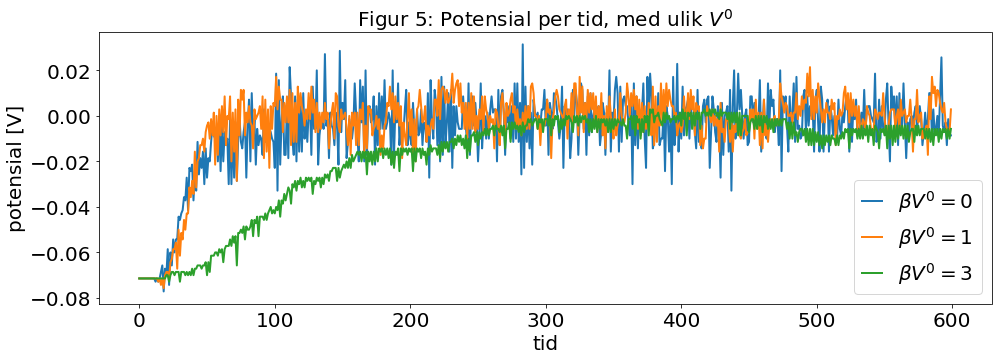

In [8]:
T0=310
kb=scipy.constants.k #Boltzmanns konstant
beta=1/(kb*T0) 


V0=1/beta
nt=600



#V0*beta=0
tList,VtList0=randomWalkMembrane(nt,Na0_out,Na0_in,K0_out,K0_in,0,0,0)
#V0*beta=1
tList,VtList1=randomWalkMembrane(nt,Na0_out,Na0_in,K0_out,K0_in,V0,V0,0)
#V0*beta=3
tList,VtList3=randomWalkMembrane(nt,Na0_out,Na0_in,K0_out,K0_in,V0*3,V0*3,0)

#plotter
plt.plot(tList,VtList0,label=r"$\beta V^0=0$")
plt.plot(tList,VtList1,label=r"$\beta V^0=1$")
plt.plot(tList,VtList3,label=r"$\beta V^0=3$")
plt.xlabel("tid")
plt.ylabel("potensial [V]")
plt.legend()
plt.title("Figur 5: Potensial per tid, med ulik " +   r'$V^0$')
plt.show()



Spenningen stabiliserer seg rundt $0 V$, men svinger litt opp og ned på grunn av partiklenes tilfeldige bevegelse. Dette er som forventet fordi så lenge det er en spenningsforskjell vil partiklene ha større sannsynlighet for å bevege seg over til den siden som minker spenningsforskjellen. Over tid vil derfor potensialforskjellen jevnes ut. 

Desto høyere $V^0$, desto mer hindres partiklene fra å gå gjennom membranen. Derfor tar det lengre tid før potensialet stabiliseres dersom spenningen over membranen er større. Dette stemmer godt overens med plottene, der særlig plottet for $\beta V^0$ lik 3 skiller seg tydelig ut. 

Plottet viser også at ved høyere $V^0$ vil spenningen variere mindre. Dette kan også forklares med at partiklene sjeldnere vil bevege seg gjennom membranen. 


# 7.2

I oppgave 7.1 ble det regnet med at $V^0_{Na}=V^0_{K}$, men i en cellemembran vil Na$^+$ ioner og K$^+$ ioner føle forskjellig potensial. I denne oppgaven studeres det hvordan forskjellen i $V_{Na}^0$ og $V_{K}^0$ påvirker hvordan spenningsforskjellen mellom innside og utside av membranen endrer seg med tiden. Dette testes ved å første sette $\beta V_{Na}^0=1$ og $\beta V_{K}^0=10$, for deretter å bytte om på verdiene. 


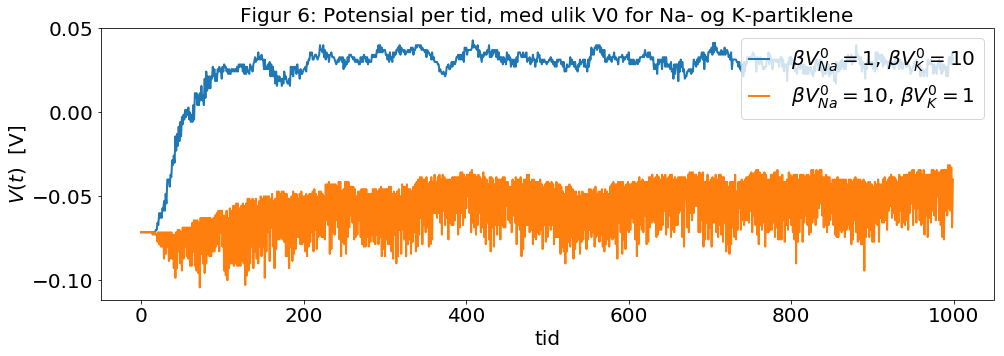

In [9]:
V01=1/beta #definerer potensialene
V02=10/beta
nt=1000 #antall tidssteg

#Med beta*V0_Na=1 og beta*V0_K=10
tList,VtNa1=randomWalkMembrane(nt,Na0_out,Na0_in,K0_out,K0_in,V01,V02)
#Med beta*V0_Na=10 og beta*V0_K=1
tList,VtNa10=randomWalkMembrane(nt,Na0_out,Na0_in,K0_out,K0_in,V02,V01)

#plotter
plt.plot(tList,VtNa1,label=r" $\beta V_{Na}^0=1$, $\beta V_K^0=10$")
plt.plot(tList,VtNa10,label=r" $\beta V_{Na}^0=10$, $\beta V_K^0=1$")
plt.xlabel("tid")
plt.ylabel(r"$V(t)$  [V]")
plt.title("Figur 6: Potensial per tid, med ulik V0 for Na- og K-partiklene")
plt.legend(loc="upper right")
plt.show()

Når $\beta V_{Na}^0=10$ og $\beta V_K^0=1$ vil potensialet stabilisere seg rundt 30 mV. Når $\beta V_K^0=10$ og $\beta V_{Na}^0=1$ vil potensialet stige sakte og stabilisere seg på et nivå litt høyere enn -70 mV. Potensialet stabiliserer seg ikke på samme sted som i oppgave 7.1 fordi Na- og K-partiklene ikke kan strømme like fritt ut og inn av cellen. 

Det er hovedsaklig to ting som får konsentrasjonene av Na- og K-partiklene inni og utenfor cellen til å endres. Det ene er ladningsfordelingen, fordi positive ladninger frastøter hverandre og partikler har størst sannsynlighet for å bevege seg i den retningen der de får minst energi. Det andre er diffusjon, som gjør at netto partikkelstrøm vil gå fra områder med høy konsentrasjon til områder med lavere konsentrasjon.

Ved start er det mange flere Na-partikler utenfor cellen enn det er innenfor cellen, og på grunn av diffusjon vil Na-partikler diffundere inn i cellen så lenge det ikke er noe potensial som hindrer dem. K-partiklene vil på samme vis diffundere ut av cellen. 

Når $\beta V_{Na}^0=1$ og $\beta V^0_K=10$, vil det være svært liten strøm av K-partikler gjennom cellemembranen. Av figur 5 kan en se at et potensial $\beta V^0=1$ gir omtrent samme oppførsel som et potensial lik 0. Na-partiklene er altså nesten uhindret av potensialet i membranen, og på grunn av potenisaldifferansen mellom innsiden og utsiden av cellen, i tillegg til konsentrasjonsforskjellen, vil strømmen av Na-partikler være stor i begynnelsen. Figur 6 viser at spenningen over membranen vil stabilisere seg på ca. 30 mV. Her er driften av Na-partikler grunnet potensialforskjell i likevekt med diffusjon på grunn av konsentrasjonsforskjell. For at potensialet skulle gått ned igjen måtte det gått positive K-partikler ut av cellen, men dette hindres av potensialet $V^0_K$. Fordi $\beta V^0_K=10$ vil ikke K-partiklene gå ut av cellen på tross av den mye høyere konsentrasjonen inni cellen. 

Når $\beta V_{Na}^0=10$ vil det være svært liten strøm av Na-partikler. Siden $\beta V_K^0=1$ vil K-partiklene mye lettere kunne strømme gjennom membranen, men de vil da bevegd seg mot potensialet på grunn av ladningsforskjellen mellom utsiden og innsiden av cellen. Altså vil ladningsforskjellen hindre K-partiklenes diffusjon, og spenningen over membranen vil holde seg relativt stabilt litt over startverdien på -70 mV. 



# 8

Til nå har vi sett på konstante potensialer $V^0_{Na}$ og $V_K^0$. For å modellere hvordan aksjonspotensial fungerer må det også tas hensyn til at ionekanaler kan åpnes og lukkes. La $\beta V_{Na}^0=\beta V_K^0=50$ tilsvare potenisalet når kanalene er lukket og $\beta V_{open}=1$ være potensialet for et ion gjennom en åpen kanal. Som i en nervecelle innføres det at når spenningen når 30 mV lukkes natriumkanalene mens kaliumkanalene åpnes. I tillegg legges det inn at når spenningen blir mindre eller lik -70 mV åpnes natriumkanaler og kaliumkanalene lukkes, og et nytt signal vil dermed avfyres. I en virkelig celle vil det være ytre faktorer som setter igang et signal, men her starter et nytt signal med en gang spenningen er tilbake på startnivået -70 mV. Signalet starter altså med at Na-partikler strømmer inn i cellen og øker potensialet til ca 30 mV, før Na-portene stenger og K-portene åpnes slik at K-partiklene kan strømme ut av cellen og bringe potensialet ned igjen til startverdien. 


## 8.1

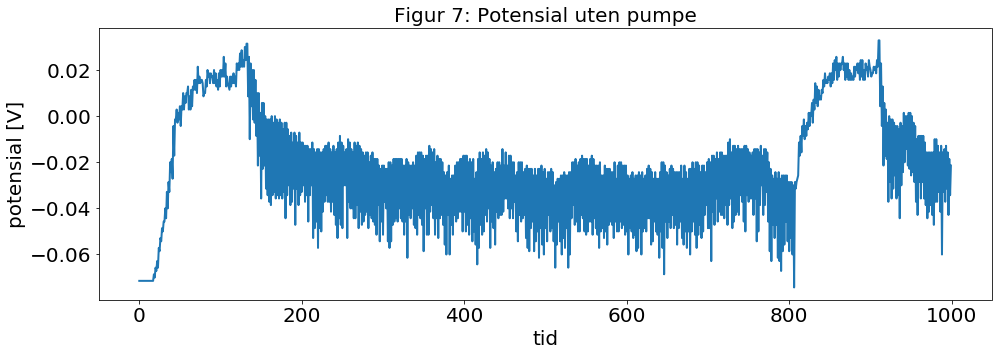

In [22]:
V_open=1/beta
V0=50/beta
nt=1000

#Kjører randomWalkMembrane uten pumpe    
tList,VtNoPump=randomWalkMembrane(nt,Na0_out,Na0_in,K0_out,K0_in,V0,V0,V_open,pump=False,gates=True)

plt.plot(tList,VtNoPump)
plt.xlabel("tid")
plt.ylabel("potensial [V]")
plt.title("Figur 7: Potensial uten pumpe")
plt.show()


Ettersom den initielle spenningen er -70 mV vil natriumkanalene åpnes og kaliumkanalene lukkes. Dette gjør at spenningen stiger raskt tilsvarende den blå grafen i figur 6. Når spenningen når 30 mV lukkes natriumkanalene samtidig som kaliumkanalene åpnes. Da vil både den høye konsentrasjonen av kaliumpartikler på innsiden samt spenningen over membranen sørge for at det er stor strøm av kalium-partikler fra innsiden til utsiden av cellen. Dette gjør at spenningen igjen synker. 

Systemet går gjennom omtrent to sykluser. Antallet sykluser er litt forskjellig hver gang fordi partikkeldiffusjonen er tilfeldig. Systemet vil gå lenge uten å avfyre signaler fordi når kaliumkanalene er åpne og natriumkanalene er lukket vil spenningen over membranen stabilisere seg på et nivå som ligger litt over -70 mV. Dette tilsvarer den oransje grafen i figur 6. Med andre ord vil ikke cellen uten pumpen nå et lavt nok potensial til å avfyre et nytt signal. 


# 8.2

I en celle vil potensialet stabilisere seg på -70 mV, dette skyldes at natrium-kalium-pumpen pumper kaliumioner inn i cellen og natriumioner ut av cellen. I denne oppgaven innføres det derfor en natrium-kalium pumpe som kjøres ved hvert tiende tidssteg. Den flytter da de tre natriumpartiklene som har posisjon nærmes cellemembranen inni cellen, over til utsiden av cellemembranen. Tilsvarende gjøres ved flytting av to kaliumioner inn i cellen. 


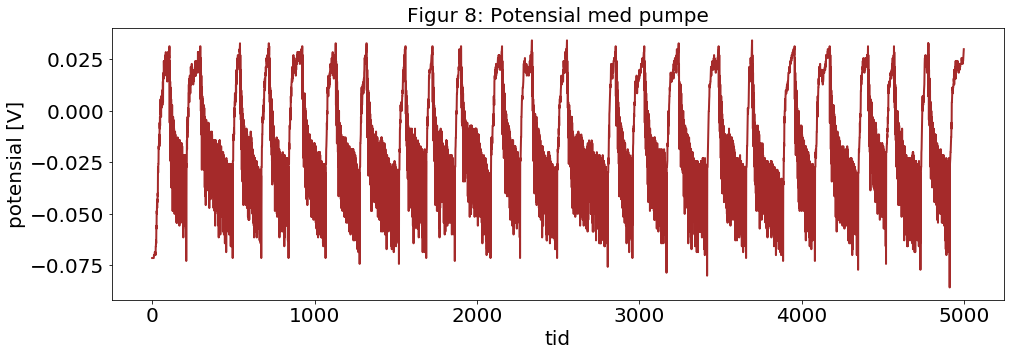

In [14]:
#Kjører randomWalkPotential med pumpe   
nt=5000
tList,VtPump=randomWalkMembrane(nt,Na0_out,Na0_in,K0_out,K0_in,V0,V0,V_open,pump=True,gates=True)

plt.plot(tList,VtPump, color="brown")
plt.xlabel("tid")
plt.ylabel("potensial [V]")
plt.title("Figur 8: Potensial med pumpe")
plt.show()


I motsetning til i oppgave 8.1 ser syklusen her ut til å fortsette. Det er fordi pumpen totalt pumper en mer ladning ut av cellen enn inn i cellen for hver gang den kjøres. Pumpen pumper natriumioner over på utsiden av cellen selv om natriumkanalene er stengt, og natriumionene vil ikke kunne diffunderer inn i cellen igjen. Kaliumionene derimot kan diffundere ut av cellen igjen, og dette vil bidra til å minke potensialet på innsiden av cellen ytterligere. Transporten av ionene på grunn av ionepumpen bidrar altså til at potensialdifferansen mellom innsiden og utsiden når et tilstrekkelig lavt nivå til at natriumkanalene åpnes og kaliumkanalene lukkes. Dermed kan et nytt signal avfyres. 
